In [1]:
import pandas as pd

# Load data
df = pd.read_csv("data/GoldHistoricalData.csv")  # Using forward slash for cross-platform compatibility
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/01/2025,"3,413.80","3,354.50","3,415.00","3,351.60",0.01K,1.52%
1,07/31/2025,"3,362.80","3,344.10","3,380.00","3,344.10",0.00K,-0.13%
2,07/30/2025,"3,367.20","3,401.30","3,402.00","3,341.40",0.05K,-0.41%
3,07/29/2025,"3,381.20","3,370.40","3,389.40","3,362.60",149.33K,0.43%
4,07/28/2025,"3,366.80","3,379.60","3,402.40","3,357.00",77.13K,-0.70%


In [2]:
df.info()
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3975 non-null   object
 1   Price     3975 non-null   object
 2   Open      3975 non-null   object
 3   High      3975 non-null   object
 4   Low       3975 non-null   object
 5   Vol.      3972 non-null   object
 6   Change %  3975 non-null   object
dtypes: object(7)
memory usage: 217.5+ KB


,Date,Price,Open,High,Low,Vol.,Change %
count,3975,3975,3975,3975,3975,3972,3975
unique,3975,3234,3169,3183,3229,3060,544
top,08/01/2025,"1,317.80","1,280.70","1,283.90","1,320.80",0.57K,0.00%
freq,1,6,6,6,6,17,35


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [4]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
3974,2010-01-04,"1,118.30","1,099.00","1,124.60","1,093.80",155.48K,2.02%
3973,2010-01-05,"1,118.70","1,122.00","1,129.60","1,115.50",156.41K,0.04%
3972,2010-01-06,"1,136.50","1,118.50","1,141.00","1,116.80",176.90K,1.59%
3971,2010-01-07,"1,133.70","1,139.00","1,139.50","1,128.70",121.15K,-0.25%
3970,2010-01-08,"1,138.90","1,131.50","1,140.00","1,119.50",212.62K,0.46%
3969,2010-01-11,"1,151.40","1,139.00","1,163.00","1,139.00",173.77K,1.10%
3968,2010-01-12,"1,129.40","1,152.00","1,158.30","1,124.30",233.12K,-1.91%
3967,2010-01-13,"1,136.80","1,129.00","1,138.90","1,118.50",217.63K,0.66%
3966,2010-01-14,"1,143.00","1,137.90","1,146.70","1,130.70",165.71K,0.55%
3965,2010-01-15,"1,130.50","1,142.00","1,146.00","1,126.50",144.70K,-1.09%


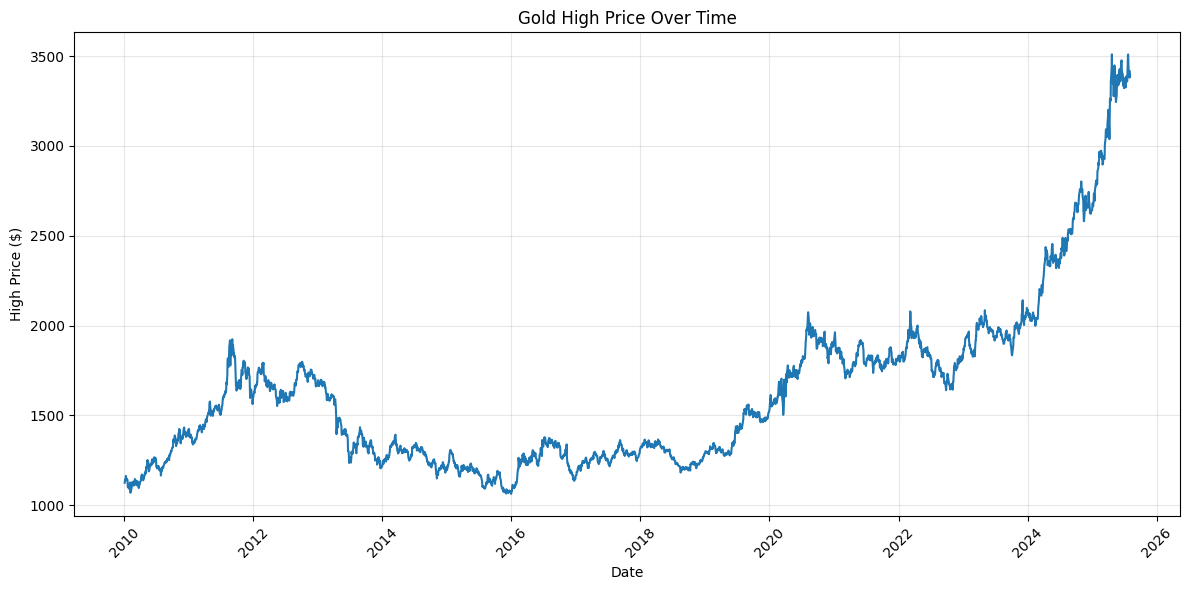

In [6]:
import matplotlib.pyplot as plt

# Convert High column to numeric (remove commas and convert to float)
df['High_numeric'] = df['High'].str.replace(',', '').astype(float)

# Plot high price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High_numeric'])
plt.title('Gold High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_numeric'])
plt.xlabel('Date')
plt.ylabel('Gold Price ($)')
plt.title('Gold Price History')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Convert Price column to numeric (remove commas and convert to float)
df['Price_numeric'] = df['Price'].str.replace(',', '').astype(float)

print("Min price:", df['Price_numeric'].min())
print("Max price:", df['Price_numeric'].max())
print("Average price:", df['Price_numeric'].mean().round(2))

Min price: 1049.6
Max price: 3501.8
Average price: 1609.05


In [12]:
# Rolling average (30 days)
df['MA_30'] = df['Price_numeric'].rolling(window=30).mean()

# Volatility (standard deviation, 30 days)
df['Volatility_30'] = df['Price_numeric'].rolling(window=30).std()

# Daily returns
df['Daily_Return'] = df['Price_numeric'].pct_change()

# Add year, month, weekday - need to set Date as index first
df.set_index('Date', inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

# Display some results
print("Data with new features:")
print(df[['Price_numeric', 'MA_30', 'Volatility_30', 'Daily_Return']].head(10))

Data with new features:
            Price_numeric  MA_30  Volatility_30  Daily_Return
Date                                                         
2010-01-04         1118.3    NaN            NaN           NaN
2010-01-05         1118.7    NaN            NaN      0.000358
2010-01-06         1136.5    NaN            NaN      0.015911
2010-01-07         1133.7    NaN            NaN     -0.002464
2010-01-08         1138.9    NaN            NaN      0.004587
2010-01-11         1151.4    NaN            NaN      0.010976
2010-01-12         1129.4    NaN            NaN     -0.019107
2010-01-13         1136.8    NaN            NaN      0.006552
2010-01-14         1143.0    NaN            NaN      0.005454
2010-01-15         1130.5    NaN            NaN     -0.010936
